In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
color = sns.color_palette()

%matplotlib inline

eng_stopwords = set(stopwords.words("english"))
pd.options.mode.chained_assignment = None

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df=train_df.append(test_df)

print("Number of rows in train dataset : ",train_df.shape[0])


Number of rows in train dataset :  27971


C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
train_df.head()


,author,id,text
0,EAP,id26305,"This process, however, afforded me no means of..."
1,HPL,id17569,It never once occurred to me that the fumbling...
2,EAP,id11008,"In his left hand was a gold snuff box, from wh..."
3,MWS,id27763,How lovely is spring As we looked from Windsor...
4,HPL,id12958,"Finding nothing else, not even gold, the Super..."


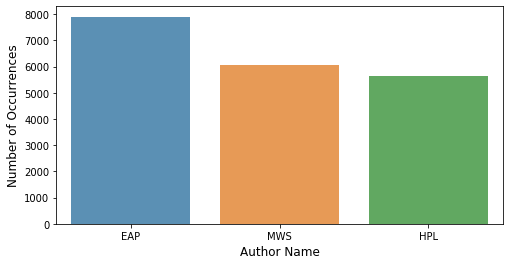

In [4]:
cnt_srs = train_df['author'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

WordClouds

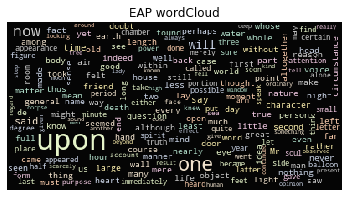

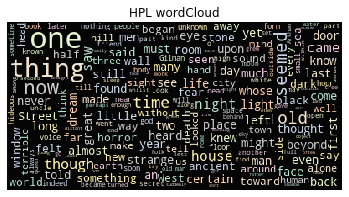

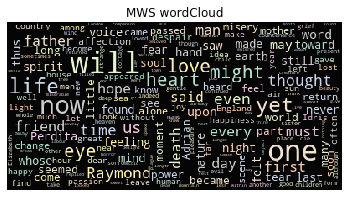

In [34]:
from matplotlib import pyplot

eap_documents = train_df[train_df.author == 'EAP']['text'].values
hpl_documents = train_df[train_df.author == 'HPL']['text'].values
mws_documents = train_df[train_df.author == 'MWS']['text'].values

eap_words = " ".join(eap_documents)
hpl_words = " ".join(hpl_documents)
mws_words = " ".join(mws_documents)

from wordcloud import WordCloud, STOPWORDS


wordcloud = WordCloud(relative_scaling = 1.0, stopwords = STOPWORDS, max_font_size= 35)
wordcloud.generate(eap_words)
plt.title('EAP wordCloud')
pyplot.imshow(wordcloud.recolor(colormap= 'Pastel2' , random_state=17), alpha=0.98)
pyplot.axis('off')
pyplot.show()

wordcloud = WordCloud(relative_scaling = 1.0, stopwords = STOPWORDS, max_font_size= 35)
wordcloud.generate(hpl_words)
plt.title('HPL wordCloud')
pyplot.imshow(wordcloud.recolor(colormap= 'Pastel2' , random_state=17), alpha=0.98)
pyplot.axis('off')
pyplot.show()

wordcloud = WordCloud(relative_scaling = 1.0, stopwords = STOPWORDS, max_font_size= 35)
wordcloud.generate(mws_words)
plt.title('MWS wordCloud')
pyplot.imshow(wordcloud.recolor(colormap= 'Pastel2' , random_state=17), alpha=0.98)
pyplot.axis('off')
pyplot.show()

In [7]:
## Number of words in the text ##
train_df["num_words"] = train_df["text"].apply(lambda x: len(str(x).split()))
#test_df["num_words"] = test_df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["text"].apply(lambda x: len(set(str(x).split())))
#test_df["num_unique_words"] = test_df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_df["num_chars"] = train_df["text"].apply(lambda x: len(str(x)))
#test_df["num_chars"] = test_df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_df["num_stopwords"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#test_df["num_stopwords"] = test_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

train_df["article"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in ('a','an','the')]))

## Number of punctuations in the text ##
train_df["num_punctuations"] =train_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#test_df["num_punctuations"] =test_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
train_df["num_words_upper"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#test_df["num_words_upper"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train_df["num_words_title"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#test_df["num_words_title"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


#apply(lambda x: len([c for c in train_df["text"] if c in string.punctuation])
      
#train_df["NOUN"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))


In [8]:
# Natural Language Toolkit: code_dictionary
import nltk
nltk.download('treebank')
nltk.download('universal_tagset')

from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words():
     counts[tag] += 1
 
counts['NN']
 

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


152470

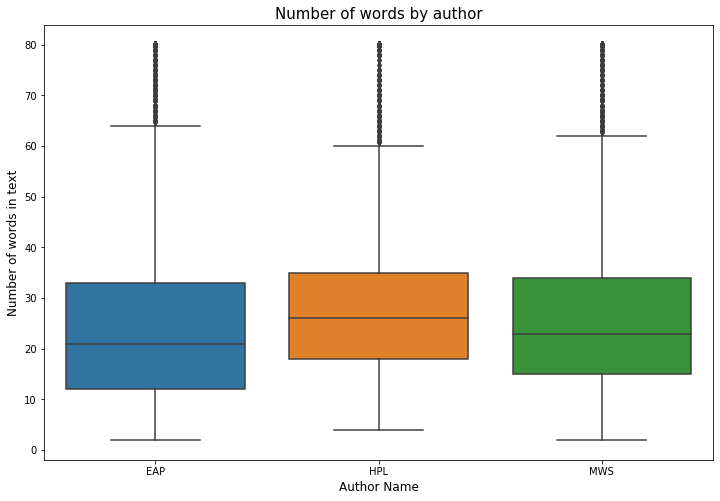

In [8]:
train_df['num_words'].loc[train_df['num_words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='num_words', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of words in text', fontsize=12)
plt.title("Number of words by author", fontsize=15)
plt.show()

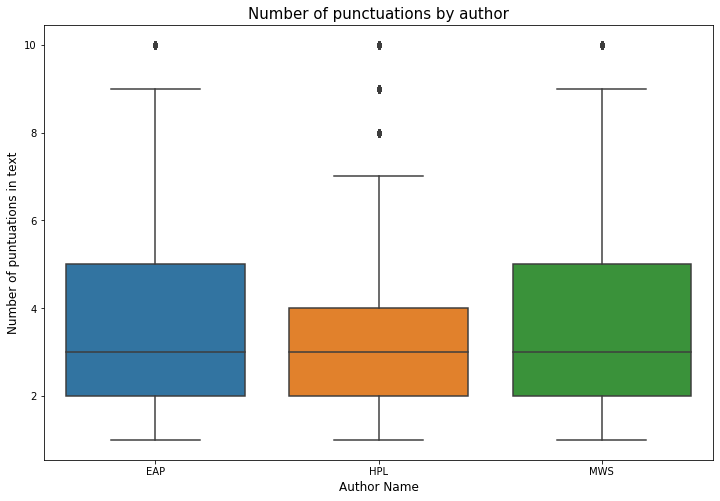

In [10]:
train_df['num_punctuations'].loc[train_df['num_punctuations']>10] = 10 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='num_punctuations', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of puntuations in text', fontsize=12)
plt.title("Number of punctuations by author", fontsize=15)
plt.show()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


41904


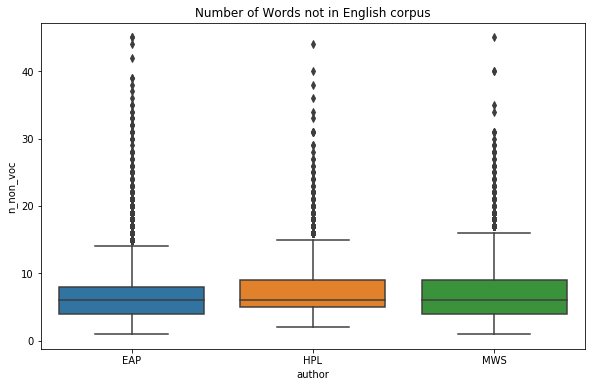

In [18]:
#set of english words
nltk.download('words')
fig_sizes = {'S' : (6.5,4),
             'M' : (9.75,6),
             'L' : (13,8)}
def show_plot(f_size=fig_sizes['M'],plot_title="",x_title="",y_title=""):
    plt.figure(figsize=f_size)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(plot_title)
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
#set of words that do not appear in the nltk engluish vocabulary
not_in_vocab = set(train_df.loc[:,'text'].str.split(expand=True).unstack()).difference(english_vocab)
print(len(not_in_vocab))
list(not_in_vocab)[:15]

train_df["n_non_voc"] = train_df['text'].str.split().apply(lambda x:len(set(x).intersection(not_in_vocab)))
ax_box = show_plot(fig_sizes['M'],'Number of Words not in English corpus','Author','Number of Words not in English corpus')
sns.boxplot(x=train_df.loc[train_df.n_non_voc<50,'author'], y=train_df.loc[train_df.n_non_voc<50,'n_non_voc'],ax=ax_box)

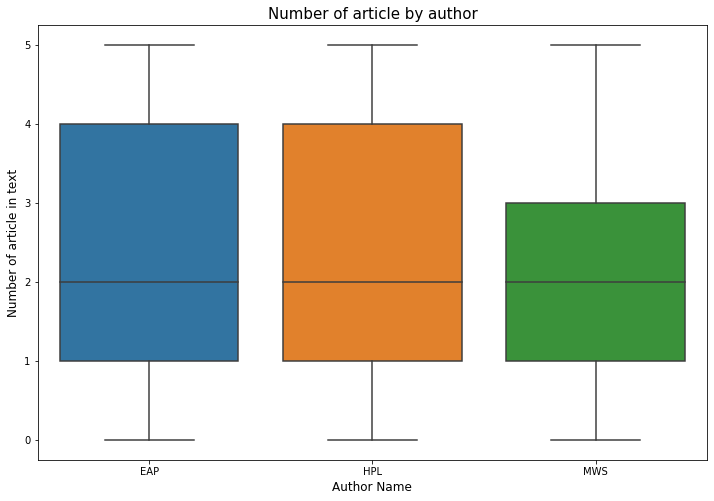

In [13]:
train_df['article'].loc[train_df['article']>5] = 5 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='article', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of article in text', fontsize=12)
plt.title("Number of article by author", fontsize=15)
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyser = SentimentIntensityAnalyzer()
train_df.loc[:,'text_sent'] = train_df['text'].apply(lambda x:analyser.polarity_scores(x)['compound'])
ax_box = show_plot(fig_sizes['M'],'Text sentiment','Author','Text sentiment distribution')
sns.violinplot(x=train_df['author'], y=train_df['text'],ax=ax_box)